In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!pip install nltk

In [3]:
#!pip install wordcloud

In [4]:
import nltk

In [5]:
#nltk.download()

In [6]:
reviews = pd.read_csv(r"C:\Users\Administrator\Desktop\unstructured elective\dataset\K8 Reviews v0.2.csv")

In [7]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [8]:
#Dataset if scrapped from Amazon for Lenovo K8 mobile phones
# Review in the form of free text was scrapped and the user rating
# A user rating of 1,2,3 -> sentiment 0
# A user rating of 4 and 5 -> sentiment 1

In [9]:
reviews.shape

(14675, 2)

In [10]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

### Get the word cloud:

    1. combine all the reviews into a single string
    2. instantiate word cloud
    3. generate the word cloud

In [11]:
from wordcloud import WordCloud

In [12]:
reviews_combined = " ".join(reviews.review.values)

In [13]:
lst = ["A","B","C"]
" ".join(lst)

'A B C'

In [14]:
len(reviews_combined)

1674772

In [15]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [16]:
word_cloud = WordCloud().generate(reviews_combined)

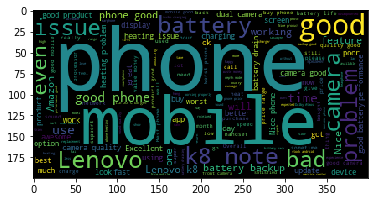

In [17]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [18]:
word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(reviews_combined)

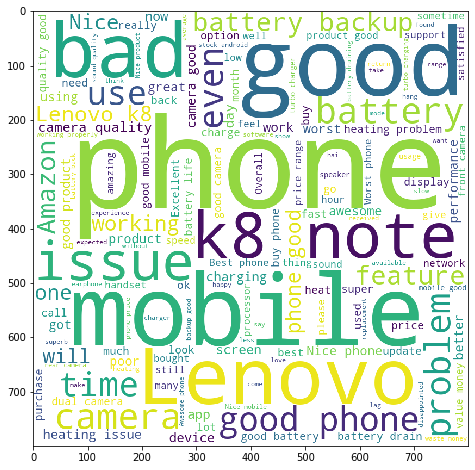

In [19]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar graph of top 25 used words

1. get the words and the frequencies
2. sort based on frequencies and get the top 25 words
3. plot the bar graph

In [20]:
#Preparing a dictionary of words and their frequencies
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [21]:
#From the dict obtain a data frame of words and freq's
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

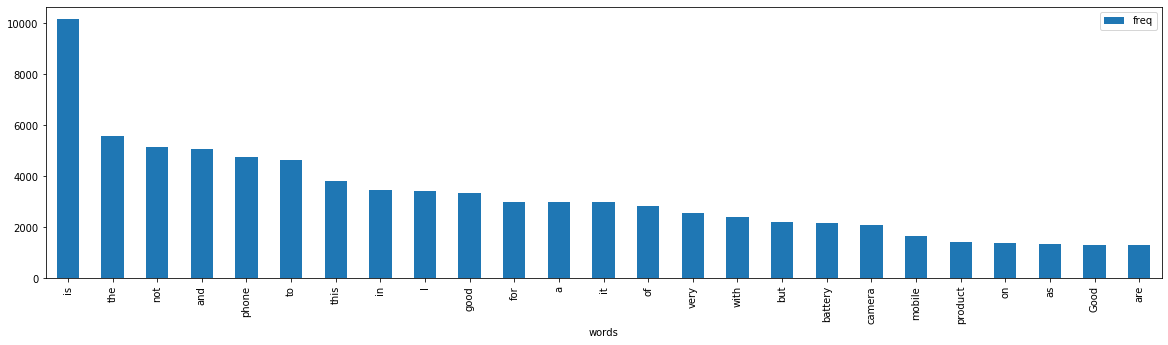

In [22]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with these visuals:
    1.Too many distinct words in the corpus of reviews
        1.text is non unifrom case
        2.punctuations present in the text
        3. there are language connectors in the text - stop words
        4. Words with different forms/tenses - charge, charged, charging

Basic Text processing tasks:
    1. Text cleaning
    2. Get the visuals - word cloud and bar graph or frequency graph
    3. Converting text to numeric matrices
    4. Advanced visuals using collocations(n-grams - unigrams, bigrams, trigrams)
    5. Sentiment analysis and sentiment classification
    6. text classification
    7. document clustering

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
all_terms = word_tokenize(reviews_combined.lower())

In [25]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [26]:
len(reviews_combined), len(all_terms)

(1674772, 324233)

In [27]:
from nltk.probability import FreqDist

In [28]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

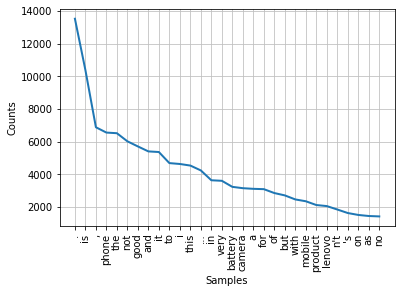

In [29]:
fdist.plot(30,cumulative=False)
plt.show()

In [30]:
#fdist.plot

The head and the tail of the above graph consists of either punct or stop words which needs to be removed

In [31]:
from string import punctuation
from nltk.corpus import stopwords

In [32]:
stop_nltk = stopwords.words("english")

In [350]:
stop_updated = stop_nltk + ["...",".."] +\
["mobile","phone","lenovo","k8","note","n't",'100']

In [34]:
reviews_updated1 = [term for term in all_terms \
if term not in stop_updated and term 
                    not in list(punctuation) and len(term)>2]

In [35]:
len(set(reviews_updated1))

18475

In [36]:
print(reviews_updated1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', '.highly', 'disappointing', 'amazon', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better',

In [37]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [38]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [39]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [40]:
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [41]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

16161 17902


stemmer reduces the number of distinct words in the corpus to a greater exten

lets build a udf

- input : review 
- Tasks : All the above cleaning steps
- Return : string of cleaned reveiw

based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_review"

In [351]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    lemmed = [lemm.lemmatize(term) for term in tokens \
               if term not in stop_updated and \
                term not in list(punctuation) and\
               len(term) > 2] 
    res = " ".join(lemmed)
    return res

In [122]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [123]:
reviews.head()

,sentiment,review,clean_review,cacl_sentiment,sent_prediction
0,1,Good but need updates and improvements,good need update improvement,3,1
1,0,"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",worst bought ever battery draining like hell backup hour internet us even put idle getting discharged.this biggest lie amazon lenove expected making full saying battery 4000mah booster charger fake take least hour fully charged.do know survive making full us.please else regret like,-8,0
2,1,when I will get my 10% cash back.... its already 15 January..,get cash back already january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon,worst everthey changed last problem still amazon returning .highly disappointing amazon,-7,0


# Word cloud on cleaned dataset

In [124]:
reviews_combined = " ".join(reviews.clean_review.values)

In [125]:
reviews_combined[:500]

'good need update improvement worst bought ever battery draining like hell backup hour internet us even put idle getting discharged.this biggest lie amazon lenove expected making full saying battery 4000mah booster charger fake take least hour fully charged.do know survive making full us.please else regret like get cash back already january.. good worst everthey changed last problem still amazon returning .highly disappointing amazon telling buyi totally disappointedpoor batterypoor camerawaste m'

In [126]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

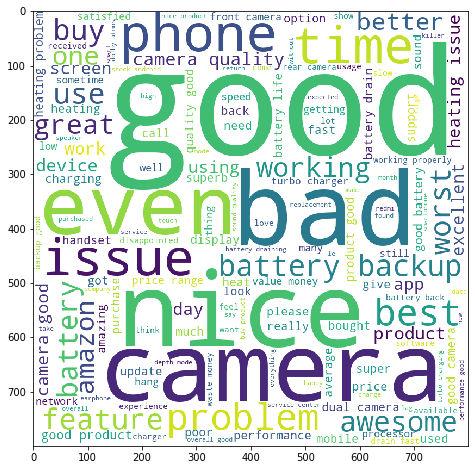

In [127]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [128]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [129]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

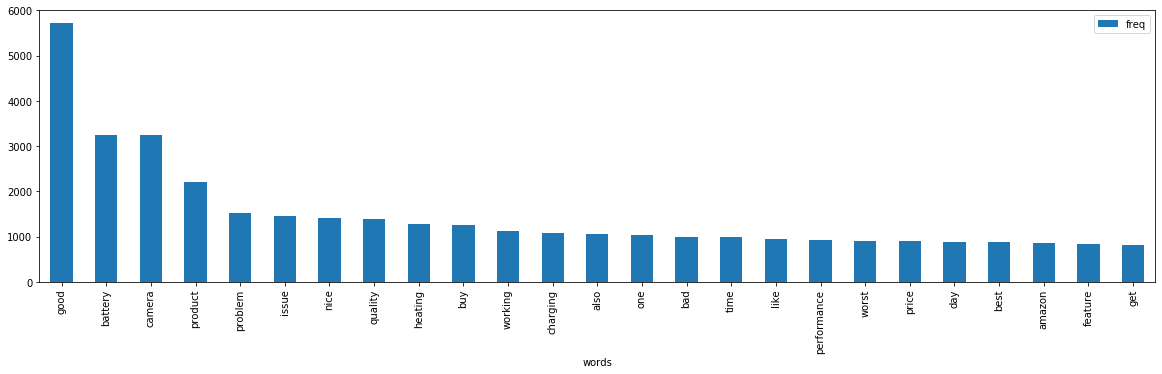

In [130]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

In [132]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=150)

In [133]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [134]:
DTM_bigram

,4000 mah,4000mah battery,4gb ram,also good,back camera,back cover,backup good,bad camera,bad experience,bad product,battery back,battery backup,battery charging,battery drain,battery draining,battery good,battery issue,battery last,battery life,battery performance,battery problem,best price,bokeh effect,build quality,buy product,call recorder,call recording,camera also,camera average,camera bad,camera battery,camera clarity,camera depth,camera good,camera performance,camera quality,camera working,cast screen,charger working,charging take,charging time,core processor,customer care,deca core,depth mode,dolby atmos,dont buy,drain fast,drain quickly,draining fast,dual camera,even though,everything good,excellent product,fast charging,feature good,feature like,feature missing,finger print,front camera,full charge,get heated,getting heat,good battery,good camera,good feature,good good,good heating,good one,good performance,good price,good product,good quality,good sound,gorilla glass,hanging problem,heating battery,heating issue,heating problem,hour charge,hour full,issue battery,jio sim,last day,life good,little bit,long time,look good,look like,low light,mah battery,many time,much better,network issue,network problem,never buy,nice camera,nice good,nice product,one best,one day,one month,one speaker,oreo update,overall good,performance good,picture quality,playing game,please buy,poor battery,poor camera,poor quality,price range,problem battery,product good,product price,quality also,quality bad,quality good,quality poor,really good,rear camera,return product,service center,service centre,sim slot,software update,sound quality,speaker working,stock android,stopped working,system update,take hour,thanks amazon,time charge,turbo charger,turbo charging,upto mark,user friendly,using last,value money,want return,waste money,work properly,working fine,working properly,worst battery,worst ever,worst product,worth money
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [135]:
bigram_count_vectorizer.get_feature_names()[:20]

['4000 mah',
 '4000mah battery',
 '4gb ram',
 'also good',
 'back camera',
 'back cover',
 'backup good',
 'bad camera',
 'bad experience',
 'bad product',
 'battery back',
 'battery backup',
 'battery charging',
 'battery drain',
 'battery draining',
 'battery good',
 'battery issue',
 'battery last',
 'battery life',
 'battery performance']

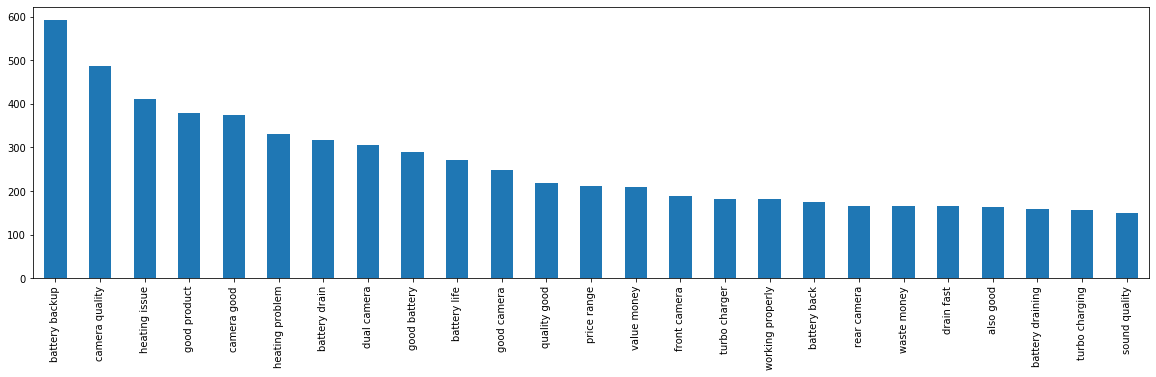

In [136]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))  

### TFIDF  for amazon reviews document

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(ngram_range=(2,2),max_features= 200)

In [138]:
X = tfidf_vect.fit_transform(reviews['clean_review'])
X

<14675x200 sparse matrix of type '<class 'numpy.float64'>'
	with 16995 stored elements in Compressed Sparse Row format>

In [139]:
print(tfidf_vect.get_feature_names())

['4000 mah', '4000mah battery', '4gb ram', 'also good', 'awesome product', 'back camera', 'back cover', 'backup good', 'bad battery', 'bad camera', 'bad experience', 'bad product', 'battery also', 'battery back', 'battery backup', 'battery charging', 'battery drain', 'battery draining', 'battery good', 'battery issue', 'battery last', 'battery life', 'battery performance', 'battery problem', 'best price', 'best product', 'bokeh effect', 'build quality', 'buy product', 'call recorder', 'call recording', 'camera also', 'camera average', 'camera awesome', 'camera bad', 'camera battery', 'camera clarity', 'camera depth', 'camera good', 'camera performance', 'camera poor', 'camera quality', 'camera working', 'cast screen', 'charger working', 'charging problem', 'charging take', 'charging time', 'core processor', 'could better', 'customer care', 'day use', 'deca core', 'depth mode', 'display good', 'do buy', 'dolby atmos', 'dont buy', 'drain fast', 'drain quickly', 'draining fast', 'dual cam

In [140]:
tfidf = pd.DataFrame(X.toarray(),columns = tfidf_vect.get_feature_names())
tfidf

,4000 mah,4000mah battery,4gb ram,also good,awesome product,back camera,back cover,backup good,bad battery,bad camera,bad experience,bad product,battery also,battery back,battery backup,battery charging,battery drain,battery draining,battery good,battery issue,battery last,battery life,battery performance,battery problem,best price,best product,bokeh effect,build quality,buy product,call recorder,call recording,camera also,camera average,camera awesome,camera bad,camera battery,camera clarity,camera depth,camera good,camera performance,camera poor,camera quality,camera working,cast screen,charger working,charging problem,charging take,charging time,core processor,could better,customer care,day use,deca core,depth mode,display good,do buy,dolby atmos,dont buy,drain fast,drain quickly,draining fast,dual camera,dual sim,even though,ever seen,everything good,excellent product,far better,fast charging,feature good,feature like,feature missing,finger print,front camera,full charge,fully charged,get heated,get hot,getting heat,getting heated,good battery,good but,good camera,good expected,good feature,good good,good heating,good looking,good one,good performance,good phone,good price,good product,good quality,good sound,gorilla glass,hanging problem,heating battery,heating charging,heating issue,heating problem,hour charge,hour full,issue battery,jio sim,last day,life good,little bit,long time,look good,look like,low light,mah battery,many problem,many time,memory card,much better,much heating,much time,music key,network issue,network problem,never buy,nice camera,nice good,nice one,nice product,normal usage,one best,one day,one month,one speaker,oreo update,otherwise good,overall good,performance battery,performance good,picture quality,playing game,please buy,pls buy,poor battery,poor camera,poor quality,price range,problem battery,product amazon,product battery,product good,product price,quality also,quality bad,quality camera,quality good,quality poor,quite good,really good,rear camera,return policy,return product,satisfied product,screen cast,selfie camera,service amazon,service center,service centre,sim card,sim slot,software update,sound quality,speaker working,stock android,stopped working,system update,take hour,take time,thanks amazon,time charge,turbo charger,turbo charging,upto mark,user friendly,using last,using month,value money,want return,waste money,within day,within month,work fine,work properly,working fine,working good,working properly,worst battery,worst camera,worst ever,worst experience,worst product,worth money
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.780596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [144]:
top_5 = tfidf.loc[(tfidf['battery drain']!=0.0) & (tfidf['camera good']!=0.0)].sort_values(by=['battery drain'], ascending = False)

In [145]:
batteri_drain = top_5[['battery drain']].sort_values(by =['battery drain'] , ascending = False)

In [146]:
camera_good = top_5[['camera good']].sort_values(by =['camera good'] , ascending = False)

In [148]:
batteri_drain.head()

,battery drain
645,0.556629
11347,0.556629
1561,0.486442
5810,0.457884
5303,0.396543


In [149]:
camera_good.head()

,camera good
645,0.535543
11347,0.535543
1561,0.468015
5810,0.440539
5303,0.381521


In [150]:
reviews['tfidf_battery drain'] = batteri_drain['battery drain']


- pd.set_option('display.max_columns', None)
- pd.set_option('display.max_colwidth', -1)

In [152]:
top_5_reviews = reviews.sort_values(by= 'tfidf_battery drain',ascending=False).head().review

In [153]:
for i in top_5_reviews.index:
    print(top_5_reviews[i])

Here are the cons of this phone1. Too heavy (180gms)2.Heats up while playing games3. Lags while gaming4. Rear camera isn't that good (whitish images)5. Volume buttons are made up of plastic6.Big bezels covers lot of space7. Battery drains faster
Cons:-1. Heating Issue2. Battery Drain Quickly3. Hotspot Issue4. Rear camera is not good
Not better phone... camera not good .... battery drain fast ... heating issueHow I can do this phone .( Return & Refund ) ?.
Overall product is gud in performance. Camera is good. Battery drains much, lasts one day on moderate use..slight heating on charge...remaining all process r excellent
Useless phone.1. It does not work properly when you are playing music via bluetooth. Sound cracks.2. Mirror casting is not available. You have to use chromecast.3. Overheating problem. Leads to battery drain.4. Dual camera in no good. Normal camera of a similarly priced phone works much better.5. Most of the chargers do not work with this phone.


#### Post class assignment

In [154]:
#   Using the below documents:
document1 = "Python is a 2000 made-for-TV horror movie directed by Richard Clabaugh. The film features several cult favorite actors, including William Zabka of The Karate Kid fame, Wil Wheaton, Casper Van Dien, Jenny McCarthy, Keith Coogan, Robert Englund (best known for his role as Freddy Krueger in the A Nightmare on Elm Street series of films), Dana Barron, David Bowe, and Sean Whalen. The film concerns a genetically engineered snake, a python, that escapes and unleashes itself on a small town. It includes the classic final girl scenario evident in films like Friday the 13th. It was filmed in Los Angeles,  California and Malibu, California. Python was followed by two sequels: Python  II (2002) and Boa vs. Python (2004), both also made-for-TV films."
document2 = "Python, from the Greek word (πύθων/πύθωνας), is a genus of nonvenomous pythons found in Africa and Asia. Currently, 7 species are recognised. A member of this genus, P. reticulatus, is among the longest snakes known."
document3 = "The Colt Python is a .357 Magnum caliber revolver formerly manufactured by Colt's Manufacturing Company of Hartford, Connecticut. It is sometimes referred to as a ""Combat Magnum"". It was first introduced in 1955, the same year as Smith &amp; Wesson's M29 .44 Magnum. The now discontinued Colt Python targeted the premium revolver market segment. Some firearm collectors and writers such as Jeff Cooper, Ian V. Hogg, Chuck Hawks, Leroy Thompson, Renee Smeets and Martin Dougherty have described the Python as the finest production revolver ever made."


Find the following: 
1)	Top 3 words unigram based on TF-IDF for document 3. 

Fill your answers below:

a.  films
b.	python
c.	California 

2)	The difference between the TF-IDF weightage of word films and film in document 1. 

Fill your answer below:
a.	0.09639805522826536

3)	Which is the document which is returned first when you search for the word "python", if there is a clash then document1 has more precedence than document 2 than document3


Document 1 and document 3


In [72]:
from nltk.tokenize import word_tokenize

In [73]:
from string import punctuation
from nltk.corpus import stopwords

In [74]:
def clean_txt_1(sent):
    tokens = word_tokenize(sent.lower())
    stop_updated = stopwords.words("english") + list(punctuation) 
    final_word = [term for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [75]:
Doc1 = clean_txt_1(document1)
Doc2 = clean_txt_1(document2)
Doc3 = clean_txt_1(document3)

data_zip = zip([Doc1,Doc2,Doc3])

In [76]:
df = pd.DataFrame(data_zip)
df.columns = ['document']

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
TV = TfidfVectorizer()

In [78]:
Y = TV.fit_transform(df['document'])
Y

<3x144 sparse matrix of type '<class 'numpy.float64'>'
	with 148 stored elements in Compressed Sparse Row format>

In [79]:
tfidf = pd.DataFrame(Y.toarray(),columns = TV.get_feature_names())

In [80]:
tfidf_T = tfidf.T

In [81]:
tfidf_T.columns = ['document1','document2','document3']

In [82]:
tfidf_T['document2'].sort_values(ascending=False).head()

genus      0.427108
πύθωνας    0.213554
asia       0.213554
found      0.213554
πύθων      0.213554
Name: document2, dtype: float64

In [83]:
tfidf_T['document3'].sort_values(ascending=False).head()

magnum      0.347064
revolver    0.347064
colt        0.347064
python      0.204981
finest      0.115688
Name: document3, dtype: float64

In [84]:
tfidf_T['document1'].sort_values(ascending=False).head()

films         0.289194
python        0.284671
california    0.192796
tv            0.192796
film          0.192796
Name: document1, dtype: float64

In [85]:
docc1 = tfidf_T['document1'].sort_values(ascending=False).head()

In [86]:
docc1.films - docc1.film

0.09639805522826536

## Practice block

In [87]:
doc_list = ['d{}'.format(i) for i in range(1,8)]
term_list = ['t{}'.format(i) for i in range(1,7)]

In [88]:
term_list[0] = [2,1,0,0,0,0,0]
term_list[1] = [1,2,0,0,0,0,1]
term_list[2] = [3,1,0,0,1,1,0]
term_list[3] = [0,0,1,2,1,1,1]
term_list[4] = [0,0,1,1,1,1,1]
term_list[5] = [0,0,1,1,0,0,0]

In [89]:
pp = pd.DataFrame(term_list, columns= doc_list)

In [90]:
pp

,d1,d2,d3,d4,d5,d6,d7
0,2,1,0,0,0,0,0
1,1,2,0,0,0,0,1
2,3,1,0,0,1,1,0
3,0,0,1,2,1,1,1
4,0,0,1,1,1,1,1
5,0,0,1,1,0,0,0


In [91]:
z = TV.fit_transform(pp)

In [92]:
TFIDF = pd.DataFrame(z.todense(),columns = TV.get_feature_names())

In [93]:
p = TfidfTransformer(smooth_idf=True,use_idf=True)
xx = p.fit(pp)

### Sentiment score analysis

In [155]:
afinn =pd.read_csv(r'C:\Users\Administrator\Desktop\unstructured elective\dataset\AFINN-111.txt','\t',header=None)
term_scores = dict(afinn.values)

In [156]:
def get_sentiment(text):
    score=0
    tokens = word_tokenize(text)
    for word in tokens:
        score  = score+term_scores.get(word,0)
    return score

In [ ]:
reviews.drop('tfidf_battery drain',axis=1,inplace=True)

In [181]:
reviews['cacl_sentiment'] = reviews['clean_review'].apply(get_sentiment)

In [182]:
reviews.sort_values(by='cacl_sentiment',ascending=False)

,sentiment,review,clean_review,cacl_sentiment,sent_prediction
8546,1,"Good phone bad camera, great performanceI'm not one to write lengthy reviews of products, but here I felt the need to get a few points out there, because the Lenovo K8 Note isn't all that it promises to be, but it's definitely not an average product either.Point is, I bought this phone to replace my Redmi Note 3, 3GB and 32GB. I have an S7 Edge as my primary driver, I've always kept a second phone to game and watch videos. The other options I had considered were the Honor 6X and The Honor 8 Lite. The reason I went with Lenovo K8 note was for the dual camera setup and a good industry reviews on performance. It wouldn't hurt that my backup phone had a dual camera setup to play around with some bokeh fun. Here's my thoughts after using the phone as my primary phone for the past 3 days.Performance:This phone is everything that every review claims it to be. Yes it has a Mediatek processor but this deca-core setup with 4GB ram and 64Gb memory is phenomenal. In my experience, this phone handles multi-tasking as good as my S7 edge. I was playing Guns Of Boom, WWE Champions, YouTube video and Facebook all at the same time, and over a period of 45 minutes, the phone switched between these apps without a single glitch or delay. WWE Champions was open when I locked my phone. When I picked it back up afetr 20 odd minutes, I found the screen exactly where I left and it loaded the game without a seconds delay. If you want this phone for casual gaming and media, its just a pleasure to use.Camera:In all fairness, the dual camera setup on the K8 note requires a lot of polishing. Its nowhere near as good as the Honor 6X. The depth detection feature is very erratic. It works like a charm under good and day light, but try using it indoors and in the evening you'll either be left with hazy photos lacking sharpness or pictures that have been focused in the wrong areas. The front 13 MP camera is good for casual selfies though.One thing though, put the flash on and both the front and the back cameras return stellar results. The bokeh effects and the depth editor functions may not work as well as they should, but if you manage to keep a steady hand and get a good shot from the dual camera setup, then playing around with the options can be fun. Changing background and focus are fun options. (Check photos)Battery, UI, Build and valueThe battery backup is great to say the least. I tested it by playing a graphic intensive Modern Combat 5 for 2.5 hours straight and the battery dropped from 100 to 50. The casual day with some gaming, social media and calling etc takes the phone to 30-20 per cent max by 12 in the night.The phone comes with a clear / transparent plastic case installed on the phone. Since there aren't any good choices for a K8 note cover, this preinstalled one serves the purpose, but it is scratch prone. Just the second day it had dozens of scratches. (Check the photo)The all metallic build of the phone looks and feel very premium. The black colour has a nice matte finish too. But the back love fingerprints and gets a smudge very easily. (Check photo) Its best to use a black armour / cover when they become available.The best part of the K8 note is the stock android UI. That ensures the K8 note is smooth and perfectly functional. Its a snappy phone alright. The finger print sensor works like a charm on both hands, it picks up even the most obscure touches.Final Word:I would definitely recommended the k8 note. In terms of sheer performance, this phone is a pleasure. Its like a tuned up KTM engine. It may not have the most appeasing specs but the performance is all throttle and torque friendly. Sadly, the camera is below average to be frank. Either Lenovo push through some tuneups or the buyers will have to keep their photography ambitions under a strict check.",good bad camera great performancei one write lengthy review product felt need get point promise definitely average pro

In [183]:
reviews['sent_prediction'] = reviews.cacl_sentiment.apply(lambda x :1 if x>2 else 0)

In [1]:
reviews

NameError: name 'reviews' is not defined

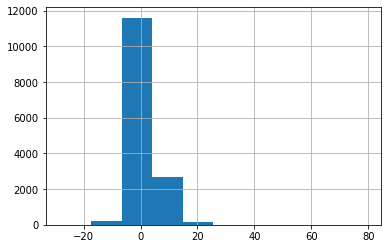

In [185]:
reviews.cacl_sentiment.hist()

In [186]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [187]:
acurracy = accuracy_score(reviews.sentiment,reviews.sent_prediction)*100

In [188]:
acurracy

77.70357751277683

In [205]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [203]:
analyser = SentimentIntensityAnalyzer()

In [204]:
def get_vader_sentiment(text):
    return analyser.polarity_scores(text)['compound']

In [206]:
reviews['original_review_score'] = reviews['review'].apply(get_vader_sentiment)

In [211]:
reviews['sent_prediction_original'] = reviews.original_review_score.apply(lambda x :1 if x>0.3 else 0)
reviews.head(1)

,sentiment,review,clean_review,cacl_sentiment,sent_prediction,original_review_score,sent_prediction_original
0,1,Good but need updates and improvements,good need update improvement,5,1,0.5994,1


In [213]:
acurracy_original = accuracy_score(reviews.sentiment,reviews.sent_prediction_original)*100
acurracy_original

79.90459965928449

### Sentiment prediction Strategy 3 : building our own model

- step 1 : get X and Y
- setp 2 : split into test and train 
- step 3 : converting text to numbers (countvectorizer or TFIDFvectorizer)
- step 4 : train
- step 5 : test and get the accuracy scores

In [228]:
x = reviews['clean_review'].values
y = reviews['sentiment'].values

In [229]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.3 , random_state= 42)

In [230]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [231]:
count_v = CountVectorizer()

- Extract the features on the review for train - fit
- Compute the count of every word extracted in every documnet(reviews)

In [239]:
x_train_bow = count_v.fit_transform(x_train)

- For all the features extracted , compute the count in the test data set of reviews

In [240]:
x_test_bow = count_v.transform(x_test)

In [241]:
print(x_train_bow.shape,x_test_bow.shape)

(10272, 9488) (4403, 9488)


In [283]:
from sklearn.naive_bayes import MultinomialNB

In [284]:
GNB = MultinomialNB()
GNB.fit(x_train_bow.toarray(),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [286]:
y_pred = GNB.predict(x_test_bow)

In [287]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [288]:
from sklearn.metrics import confusion_matrix,accuracy_score
con_matrix = confusion_matrix(y_test,y_pred)
print(con_matrix)

[[1953  358]
 [ 297 1795]]


In [289]:
print(x_test_bow.shape,y_pred.shape)

(4403, 9488) (4403,)


In [290]:
score = accuracy_score(y_test,y_pred)*100

In [291]:
score

85.1237792414263

## Email_spam_classification_Case_study

In [366]:
spam = pd.read_excel(r'C:\Users\Administrator\Desktop\unstructured elective\dataset\data.csv.xlsx')
spam

,email subject,Label ( Spam/not_Spam)
0,Great offer ends today,spam
1,Your twitter Account is ready,Not spam
2,your account has won 100 cores,spam
3,Get expert opinion for your retirement. Offers ends today,spam
4,payment Acknowledgement,Not spam
5,Congratulations. Your coupon has won Ipad today,spam


In [372]:
stop_updated1 = stop_nltk + ["...",".."] +\
["mobile","phone","lenovo","k8","note","n't",'100','would','could']

In [373]:
def clean_txt1(sent):
    tokens = word_tokenize(sent.lower())
    lemmed = [lemm.lemmatize(term) for term in tokens \
               if term not in stop_updated1 and \
                term not in list(punctuation) and\
               len(term) > 2] 
    res = " ".join(lemmed)
    return res

In [374]:
spam.columns = [i.lower() for i in spam.columns]

In [375]:
spam['clean_email_subject'] = spam['email subject'].apply(clean_txt1)
cc = count_v.fit_transform(spam['clean_email_subject'])
DTM_original = pd.DataFrame(cc.toarray() , columns = count_v.get_feature_names())
DTM_original.sum().sort_values(ascending=False)

today              3
account            2
offer              2
end                2
expert             1
acknowledgement    1
congratulation     1
core               1
coupon             1
twitter            1
get                1
ipad               1
opinion            1
payment            1
ready              1
retirement         1
great              1
dtype: int64

In [376]:
DTM_original['label'] = spam['label ( spam/not_spam)']
DTM_original

,account,acknowledgement,congratulation,core,coupon,end,expert,get,great,ipad,offer,opinion,payment,ready,retirement,today,twitter,label
0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,spam
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,Not spam
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,spam
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Not spam
5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,spam


In [377]:
X = spam['clean_email_subject'].iloc[0:6].values
Y = spam['label ( spam/not_spam)'].iloc[0:6].apply(lambda x : 1 if x =='spam' else 0)

In [387]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size =0.2,random_state =42)

In [388]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

In [389]:
X_train_words= tf.fit_transform(X_train)

In [390]:
X_test_words = tf.transform(X_test)

In [391]:
print(X_train_words.shape,X_test_words.shape )

(4, 14) (2, 14)


In [392]:
dtm = pd.DataFrame(X_train_words.toarray(),columns = tf.get_feature_names())
dtm

,account,acknowledgement,congratulation,core,coupon,end,expert,get,ipad,offer,opinion,payment,retirement,today
0,0.000000,0.000000,0.525473,0.000000,0.525473,0.000000,0.000000,0.000000,0.525473,0.000000,0.000000,0.000000,0.000000,0.414289
1,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.388614,0.388614,0.388614,0.000000,0.388614,0.388614,0.000000,0.388614,0.306388


In [393]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_words,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [394]:
a_score = accuracy_score(Y_test,MNB.predict(X_test_words))*100

In [395]:
a_score

50.0